In [1]:
# Import Libraries
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
# Cleaning was handled in Subscore Analysis
data = pd.read_csv('../Datasets/clean.csv')

In [3]:
print(smf.ols('QOLS ~ BLEEDING',data=data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   QOLS   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     75.59
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           1.38e-13
Time:                        17:23:05   Log-Likelihood:                -391.22
No. Observations:                  93   AIC:                             786.4
Df Residuals:                      91   BIC:                             791.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8066      2.044      9.199      0.0

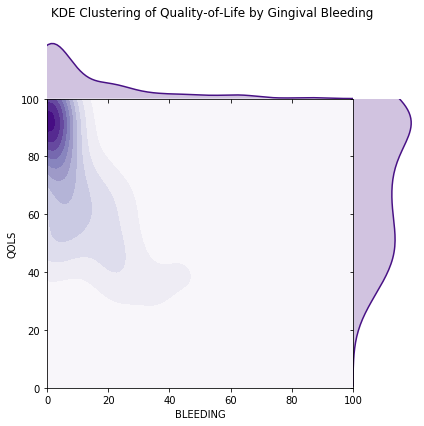

In [3]:
age_all = sns.jointplot(kind='kde',data=data,x='BLEEDING',y='QOLS',cmap='Purples',xlim=(0,100),ylim=(0,100),n_levels=10,space=0,marginal_kws={'color':'#481185'})

age_all.ax_joint.set_facecolor('#F6F5F9')
age_all.fig.subplots_adjust(top=.9)
age_all.fig.suptitle('KDE Clustering of Quality-of-Life by Gingival Bleeding')
plt.savefig('../Figures/bleeding.png')
plt.show()

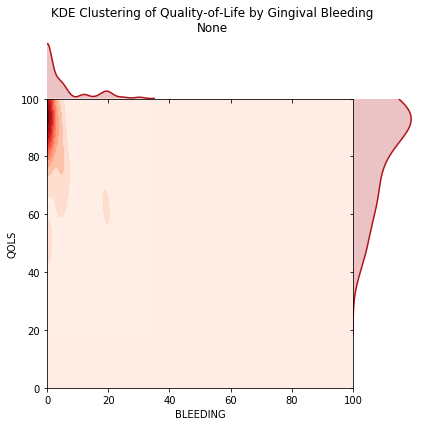

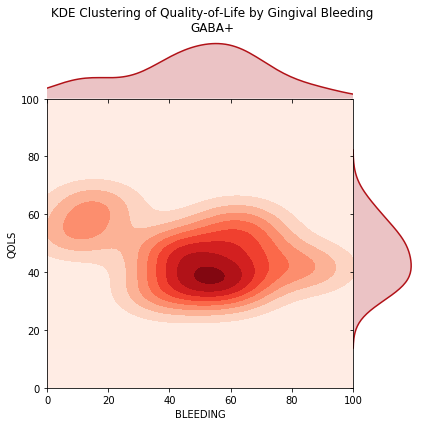

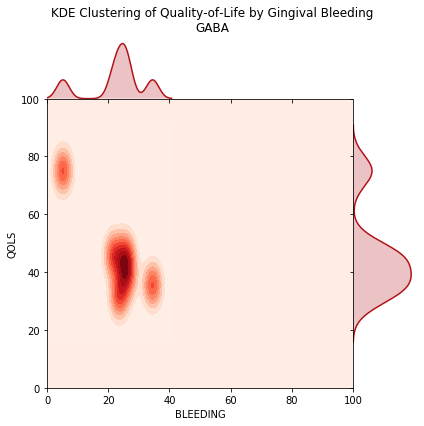

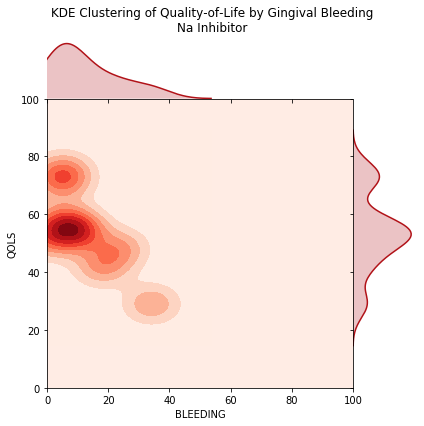

In [4]:
medication_dict = {
    0:'None',
    1:'GABA+',
    2:'GABA',
    3:'Na Inhibitor',
    4:'Ca Inhibitor'
}

for med_type in range(0,4):
    age_p = sns.jointplot(kind='kde',data=data[data['MEDICATION'] == med_type],x='BLEEDING',y='QOLS',cmap='Reds',xlim=(0,100),ylim=(0,100),n_levels=10,space=0,marginal_kws={'color':'#B11218'})

    age_p.ax_joint.set_facecolor('#FFECE4')
    age_p.fig.subplots_adjust(top=.9)
    age_p.fig.suptitle('KDE Clustering of Quality-of-Life by Gingival Bleeding\n{}' .format(medication_dict[med_type]))
    plt.savefig('../Figures/{}_bleeding_qols.png' .format(medication_dict[med_type]))
    plt.show()

In [5]:
smf.ols('BLEEDING ~ C(MEDICATION)', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BLEEDING   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     38.75
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.13e-18
Time:                        09:51:50   Log-Likelihood:                -354.44
No. Observations:                  93   AIC:                             718.9
Df Residuals:                      88   BIC:                             731.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4800      1.395      3.212      0.002       1.708       7.252
C(MEDICATION)[T.1]    44.3655      3.666     12.102      0.000      37.080      51.651
C(MEDICATION)[T.2]    18.3367      4.798      3.822      0.000       8.802      27.871
C(MEDICATION)[T.3]     7.7089      3.999      1.928      0.057      -0.239      15.656
C(MEDICATION)[T.4]    19.4700      8.072      2.412      0.018       3.428      35.512
==============================================================================
Omnibus:                       10.923   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               29.193
Skew:                           0.130   Prob(JB):                     4.58e-07
Kurtosis:                       5.732   Cond. No.                         7.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

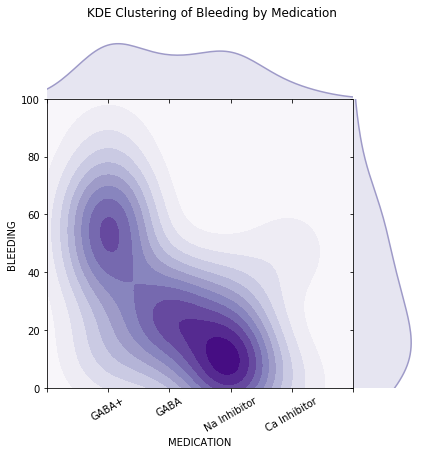

In [6]:
data_medication = data[data['MEDICATION'] != 0]
med = sns.jointplot(data=data_medication,x='MEDICATION', y='BLEEDING', kind='kde',xlim=(0,5),ylim=(0,100),n_levels=10,
                    cmap='Purples',space=0,marginal_kws={'color':'#9E9AC8'})
med.ax_joint.set_xticklabels(['',*(list(medication_dict.values())[1:])],rotation=30)
med.ax_joint.set_facecolor('#F8F6FA')
med.fig.subplots_adjust(top=.9)
med.fig.suptitle('KDE Clustering of Bleeding by Medication')
plt.savefig('../Figures/bleeding_kde.png')
plt.show()

In [9]:
c_data = data_medication[data_medication['CONSTIPATION'] == True]
nc_data = data_medication[data_medication['CONSTIPATION'] == False]

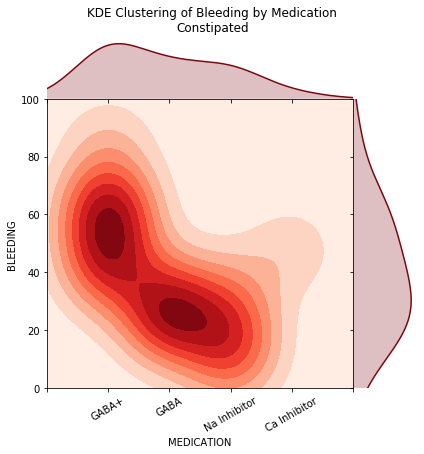

In [10]:
c_med = sns.jointplot(data=c_data,x='MEDICATION', y='BLEEDING', kind='kde',xlim=(0,5),ylim=(0,100),n_levels=10,
                    cmap='Reds',space=0,marginal_kws={'color':'#7E060F'})
c_med.ax_joint.set_xticklabels(['',*(list(medication_dict.values())[1:])],rotation=30)
c_med.ax_joint.set_facecolor('#FFEEE6')
c_med.fig.subplots_adjust(top=.9)
c_med.fig.suptitle('KDE Clustering of Bleeding by Medication\nConstipated')
plt.savefig('../Figures/bleeding_kde_c.png')
plt.show()

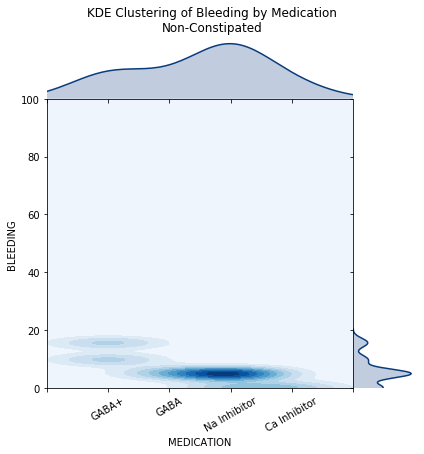

In [11]:
nc_med = sns.jointplot(data=nc_data,x='MEDICATION', y='BLEEDING', kind='kde',xlim=(0,5),ylim=(0,100),n_levels=10,
                    cmap='Blues',space=0,marginal_kws={'color':'#083B7C'})
nc_med.ax_joint.set_xticklabels(['',*(list(medication_dict.values())[1:])],rotation=30)
nc_med.ax_joint.set_facecolor('#EEF5FC')
nc_med.fig.subplots_adjust(top=.9)
nc_med.fig.suptitle('KDE Clustering of Bleeding by Medication\nNon-Constipated')
plt.savefig('../Figures/bleeding_kde_nc.png')
plt.show()

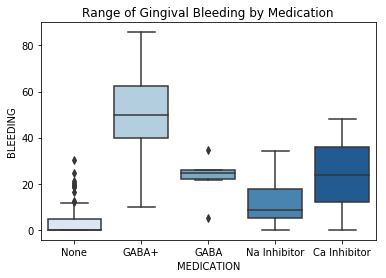

In [12]:
bleeding_box = sns.boxplot(data=data,x='MEDICATION',y='BLEEDING',palette='Blues')
bleeding_box.set_title('Range of Gingival Bleeding by Medication')
bleeding_box.set_xticklabels([*medication_dict.values()])
plt.savefig('../Figures/bleeding_box.png')
plt.show()